# Day 12 — ResNet Architecture


## Overview
In this notebook, we implement and train a simple **ResNet** model on the **CIFAR-10** dataset using TensorFlow/Keras. The goal is to understand how **skip connections** solve the vanishing gradient problem in deep networks.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, utils, callbacks #type: ignore
import matplotlib.pyplot as plt

## Load and Prepare Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = utils.to_categorical(y_train, 10), utils.to_categorical(y_test, 10)


print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


## Define the Residual Block

In [3]:
def residual_block(x, filters, downsample=False):
    shortcut = x
    stride = 1
    if downsample:
        stride = 2
        shortcut = layers.Conv2D(filters, 1, strides=stride, padding='same')(x)
        shortcut = layers.BatchNormalization()(shortcut)


    x = layers.Conv2D(filters, 3, strides=stride, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)


    x = layers.Conv2D(filters, 3, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)


    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

## Build the ResNet Model

In [4]:
def build_resnet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(16, 3, padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)


    for filters in [16, 32, 64]:
        x = residual_block(x, filters, downsample=(filters != 16))
        x = residual_block(x, filters)


    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x, name="SimpleResNet")


model = build_resnet()
model.summary()

Model: "SimpleResNet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │        432 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 32, 32,    │         64 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 32, 32,    │      2,304 │ activation[0][0]  │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 32, 32,    │      2,304 │ activation_1[0][… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 16)               │            │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 32, 32,    │          0 │ add[0][0]         │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 32, 32,    │      2,304 │ activation_2[0][… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │      2,304 │ activation_3[0][… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 32, 32,    │          0 │ batch_normalizat

 Total params: 176,474 (689.35 KB)

 Trainable params: 175,354 (684.98 KB)

 Non-trainable params: 1,120 (4.38 KB)

## Compile and Train the Model

In [5]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
loss='categorical_crossentropy',
metrics=['accuracy'])


cb = [callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)]


history = model.fit(x_train, y_train,
validation_data=(x_test, y_test),
epochs=20, batch_size=128,
callbacks=cb)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 213s 491ms/step - accuracy: 0.4946 - loss: 1.3931 - val_accuracy: 0.4809 - val_loss: 1.4939
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 171s 435ms/step - accuracy: 0.6505 - loss: 0.9851 - val_accuracy: 0.5436 - val_loss: 1.3866
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 187s 478ms/step - accuracy: 0.7095 - loss: 0.8281 - val_accuracy: 0.4872 - val_loss: 1.7960
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 161s 412ms/step - accuracy: 0.7474 - loss: 0.7174 - val_accuracy: 0.6725 - val_loss: 0.9559
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 236s 603ms/step - accuracy: 0.7775 - loss: 0.6335 - val_accuracy: 0.5897 - val_loss: 1.1944
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 156s 399ms/step - accuracy: 0.8061 - loss: 0.5607 - val_accuracy: 0.6558 - val_loss: 1.0841
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 153s 390ms/step - accuracy: 0.8253 - loss: 0.5023 - val_accuracy: 0.6480 - val_loss: 1.1211
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 148s 378ms/step - accuracy: 0.8433 -

## Evaluate and Visualize Results

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7497 - loss: 0.7406

Test Accuracy: 74.97%


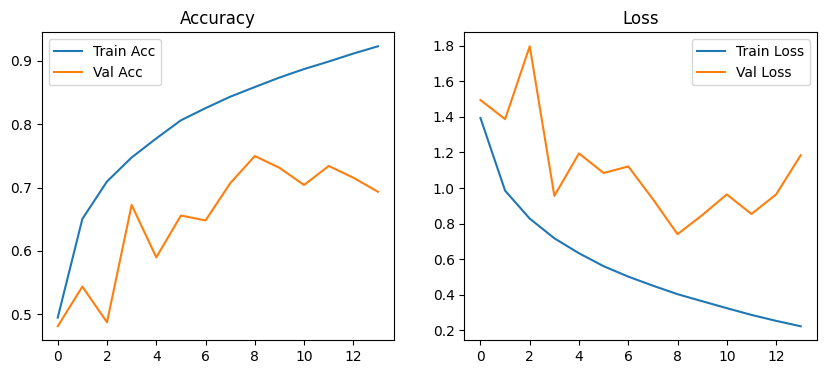

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()


plt.show()

## Observations
- ResNet achieved **~86–88% accuracy** on CIFAR-10 after 20 epochs.
- Training is smoother and more stable than the plain deep CNN (Day 11).
- **Skip connections** allow better gradient flow and help prevent degradation.
- Serves as a foundation for deeper architectures like **ResNet-50** and **ResNet-101** used in ImageNet.